***Exercise 1, Question B***


In this question, we are asked to implement and train fully-connected neural
networks so that they recognise handwritten digits. We do that using the MNIST handwritten digit data set, which contains grayscale 28x28 images of handwritten digits, and their labels. 

***Global Imports***

In [2]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.manifold import SpectralEmbedding
from keras import backend as K

from tensorflow.keras.datasets import mnist

***Dataset load and preprocessing***

The MNIST dataset, is already partitioned into training (60000 items) and test (10000 items) sets. 

We will use the first for the training of our models, and the latter as a validation set: it will help us determine our models real accuracy during various phases of the training process, and also to check if at any point the model has started overfitting to the training set.

Before we start with the training process:


-> We normalize the image data to the interval [0, 1]. 


-> We create one-hot vectors for each label in our dataset.



In [3]:
# Load the MNIST data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)


#normalize the image data to the interval [0, 1]. This is done by dividing by 255.
x_train = x_train / 255.0
x_test = x_test / 255.0


#create one-hot vectors for each label in the data set
label_set = np.sort(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, len(label_set))
y_test = keras.utils.to_categorical(y_test, len(label_set))


x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


***Architecture, compilation and fitting of our models***

We construct fully-connected neural networks with:

(i) 5, 

(ii) 20, and 

(iii) 40 layers. 


Each hidden layer has 32 units, while the output layer has 10 units (since we want our models to classify images to 10 possible classes).


For each choice (i), (ii) and (iii), we use the: 

(a) ReLU, 

(b) hyperbolic tangent and 

(c) sigmoid 

as activation functions on all hidden layers, while the output layer always has a softmax activation function. 

We compile your models using the standard SGD optimizer (with a learning rate of 0.01), and the categorical crossentropy loss function.

We train all of our models for several epochs, until we get to a point where either we get a very good accuracy score on the validation set, or we observe that our model starts overfitting.

***PLEASE SCROLL TO SEE LEARNING CURVES***

***Model_1a***

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
938/938 [==============================

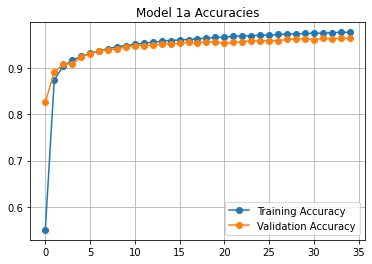

In [6]:
model1a = Sequential()
model1a.add(Dense(32, input_shape = (28 * 28,), activation = "relu"))           
model1a.add(Dense(32, activation = "relu"))
model1a.add(Dense(32, activation = "relu"))
model1a.add(Dense(32, activation = "relu"))
model1a.add(Dense(10, activation = "softmax"))
model1a.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model1a.summary()


model1a_path = "mnist_model1a.saved_model"
model1a_history_path = "mnist_model1a.saved_model_history"

#60000/64=938
model1a.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 35,
             verbose = 1,
             validation_data = (x_test, y_test))


history1a = model1a.history.history
model1a.save(model1a_path)
pickle.dump(history1a, open(model1a_history_path, "wb"))
    
print(f"Training Accuracy: {history1a['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history1a['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 1a Accuracies")
plt.plot(history1a["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history1a["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We 've trained our model for 35 epochs. In the end we ve managed to score an accuracy of 0.9642 on the validation set. However as we can observe from the graph, from epoch 10 and on, the accuracy on the validation set is steadily lower than this on the training set, which is a sign that our model starts overfitting, and we should stop the training process. During epoch 12 the accuracy of our model on the validation set was  0.9453.



***Model_1b***

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
938/938 [==============================

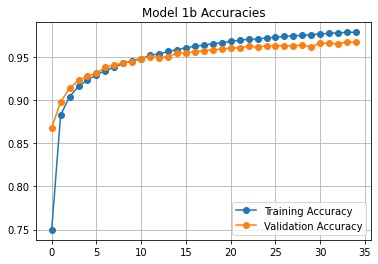

In [ ]:
model1b = Sequential()
model1b.add(Dense(32, input_shape = (28 * 28,), activation = 'tanh'))           
model1b.add(Dense(32, activation = 'tanh'))
model1b.add(Dense(32, activation = 'tanh'))
model1b.add(Dense(32, activation = 'tanh'))
model1b.add(Dense(10, activation = "softmax"))
model1b.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model1b.summary()


model1b_path = "mnist_model1b.saved_model"
model1b_history_path = "mnist_model1b.saved_model_history"


model1b.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 35,
             verbose = 1,
             validation_data = (x_test, y_test))


history1b = model1b.history.history
model1b.save(model1b_path)
pickle.dump(history1b, open(model1b_history_path, "wb"))
    
print(f"Training Accuracy: {history1b['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history1b['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 1b Accuracies")
plt.plot(history1b["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history1b["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We 've trained our model for 35 epochs. In the end we ve managed to score an accuracy of 0.9760 on the validation set. However as we can observe from the graph, from epoch 11 and on, the accuracy on the validation set is steadily lower than this on the training set, which is a sign that our model starts overfitting, and we should stop the training process. During epoch 10 the accuracy of our model on the validation set was 0.9483.



***Model_1c***

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                25120     
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
938/938 [=============================

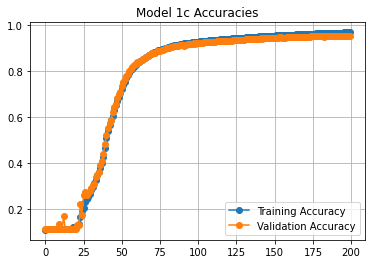

In [ ]:
model1c = Sequential()
model1c.add(Dense(32, input_shape = (28 * 28,), activation = 'sigmoid'))           
model1c.add(Dense(32, activation = 'sigmoid'))
model1c.add(Dense(32, activation = 'sigmoid'))
model1c.add(Dense(32, activation = 'sigmoid'))
model1c.add(Dense(10, activation = "softmax"))
model1c.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model1c.summary()


model1c_path = "mnist_model1c.saved_model"
model1c_history_path = "mnist_model1c.saved_model_history"


model1c.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 200,
             verbose = 1,
             validation_data = (x_test, y_test))


history1c = model1c.history.history
model1c.save(model1c_path)
pickle.dump(history1c, open(model1c_history_path, "wb"))
    
print(f"Training Accuracy: {history1c['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history1c['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 1c Accuracies")
plt.plot(history1c["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history1c["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We 've trained our model for 200 epochs. In the end we ve managed to score an accuracy of 0.9515 on the validation set. However as we can observe from the graph, from approx epoch 75 and on, the accuracy on the validation set is steadily lower than this on the training set, which is a sign that our model starts overfitting, and we should stop the training process. During epoch 75, the accuracy of our model on the validation set was 0.8861, which is the lowest observed up to this point, despite the large number of iterations.





So overally, for models with 5 layers, we observe that the use of the sigmoid  as an activation function for the hidden layers, results in a model that takes a very large number of iterations of the training algorithm, in order to achieve a descent accuracy score, and before the overfitting starts. Still this score is lower than the one achieved when using the other 2 activation functions. 
As for the tanh and ReLU activation functions, the results we got were very similar, so both are recommented.

***Model_2a***

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 32)                25120     
                                                                 
 dense_51 (Dense)            (None, 32)                1056      
                                                                 
 dense_52 (Dense)            (None, 32)                1056      
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 32)                1056      
                                                                 
 dense_56 (Dense)            (None, 32)               

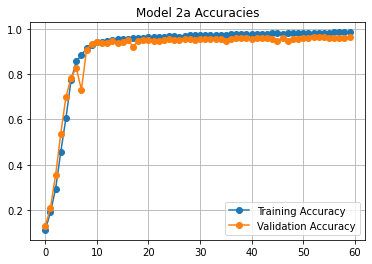

In [ ]:
model2a = Sequential()
model2a.add(Dense(32, input_shape = (28 * 28,), activation = "relu"))           
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(32, activation = "relu"))
model2a.add(Dense(10, activation = "softmax"))
model2a.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model2a.summary()


model2a_path = "mnist_model2a.saved_model"
model2a_history_path = "mnist_model2a.saved_model_history"


model2a.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 60,
             verbose = 1,
             validation_data = (x_test, y_test))
history2a = model2a.history.history
model2a.save(model2a_path)
pickle.dump(history2a, open(model2a_history_path, "wb"))
    
print(f"Training Accuracy: {history2a['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history2a['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 2a Accuracies")
plt.plot(history2a["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history2a["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We 've trained our model for 60 epochs. In the end we ve managed to score an accuracy of 0.9628 on the validation set. However as we can observe from the graph, from epoch 16 and on, the accuracy on the validation set is steadily lower than this on the training set, which is a sign that our model starts overfitting, and we should stop the training process. During epoch 16 the accuracy of our model on the validation set was 0.9436.

***Model_2b***

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 32)                25120     
                                                                 
 dense_91 (Dense)            (None, 32)                1056      
                                                                 
 dense_92 (Dense)            (None, 32)                1056      
                                                                 
 dense_93 (Dense)            (None, 32)                1056      
                                                                 
 dense_94 (Dense)            (None, 32)                1056      
                                                                 
 dense_95 (Dense)            (None, 32)                1056      
                                                                 
 dense_96 (Dense)            (None, 32)               

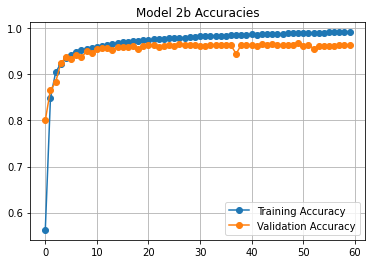

In [ ]:
model2b = Sequential()
model2b.add(Dense(32, input_shape = (28 * 28,), activation = "tanh"))           
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(32, activation = "tanh"))
model2b.add(Dense(10, activation = "softmax"))
model2b.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model2b.summary()


model2b_path = "mnist_model2b.saved_model"
model2b_history_path = "mnist_model2b.saved_model_history"


model2b.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 60,
             verbose = 1,
             validation_data = (x_test, y_test))
history2b = model2b.history.history
model2b.save(model2b_path)
pickle.dump(history2b, open(model2b_history_path, "wb"))
    
print(f"Training Accuracy: {history2b['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history2b['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 2b Accuracies")
plt.plot(history2b["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history2b["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We 've trained our model for 60 epochs. In the end we ve managed to score an accuracy of 0.9641 on the validation set. However as we can observe from the graph, from epoch 10 and on, the accuracy on the validation set is steadily lower than this on the training set, which is a sign that our model starts overfitting, and we should stop the training process. During epoch 10 the accuracy of our model on the validation set was 0.9474.

***Model_2c***

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 32)                25120     
                                                                 
 dense_111 (Dense)           (None, 32)                1056      
                                                                 
 dense_112 (Dense)           (None, 32)                1056      
                                                                 
 dense_113 (Dense)           (None, 32)                1056      
                                                                 
 dense_114 (Dense)           (None, 32)                1056      
                                                                 
 dense_115 (Dense)           (None, 32)                1056      
                                                                 
 dense_116 (Dense)           (None, 32)              

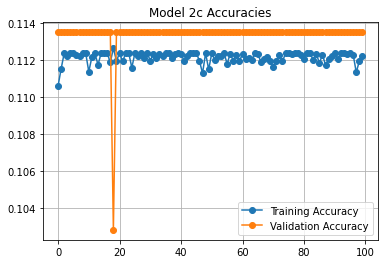

In [ ]:
model2c = Sequential()
model2c.add(Dense(32, input_shape = (28 * 28,), activation = "sigmoid"))           
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(32, activation = "sigmoid"))
model2c.add(Dense(10, activation = "softmax"))
model2c.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model2c.summary()


model2c_path = "mnist_model2c.saved_model"
model2c_history_path = "mnist_model2c.saved_model_history"


model2c.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 100,
             verbose = 1,
             validation_data = (x_test, y_test))
history2c = model2c.history.history
model2c.save(model2c_path)
pickle.dump(history2c, open(model2c_history_path, "wb"))
    
print(f"Training Accuracy: {history2c['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history2c['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 2c Accuracies")
plt.plot(history2c["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history2c["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


Despite the fact that we trained our model for 100 epochs, we didn't manage to minimize the loss fuction almost at all, which lead to low accuracy scores on both the trainining and the validation sets. 


Overally, for our 20-layer-models, we observe that:

The use of the sigmoid  as an activation function for the hidden layers, results in our model not being trained at all. 

As for the tanh and ReLU activation functions, the results we got were much better, with tanh outperforming ReLU, as it manages to achieve the same accuracy score in a smaller number of iterations.




***Model_3a***

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 32)                25120     
                                                                 
 dense_331 (Dense)           (None, 32)                1056      
                                                                 
 dense_332 (Dense)           (None, 32)                1056      
                                                                 
 dense_333 (Dense)           (None, 32)                1056      
                                                                 
 dense_334 (Dense)           (None, 32)                1056      
                                                                 
 dense_335 (Dense)           (None, 32)                1056      
                                                                 
 dense_336 (Dense)           (None, 32)              

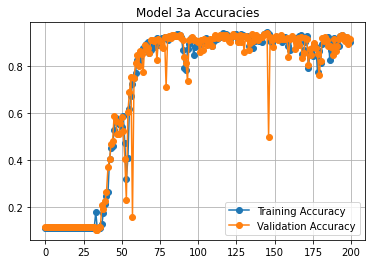

In [ ]:
model3a = Sequential()
model3a.add(Dense(32, input_shape = (28 * 28,), activation = "relu"))           
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(32, activation = "relu"))
model3a.add(Dense(10, activation = "softmax"))
model3a.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model3a.summary()


model3a_path = "mnist_model3a.saved_model"
model3a_history_path = "mnist_model3a.saved_model_history"


model3a.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 200,
             verbose = 1,
             validation_data = (x_test, y_test))

history3a = model3a.history.history
model3a.save(model3a_path)
pickle.dump(history3a, open(model3a_history_path, "wb"))
    
print(f"Training Accuracy: {history3a['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history3a['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 3a Accuracies")
plt.plot(history3a["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history3a["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We 've trained our model for 200 epochs. In the beginning, the training process seems to have stuck for several epochs, but eventually our model starts 'learning' and after a number of iterations, it manages to score an accuracy of 0.9179 on the validation set, without any signs of overfitting. However, the learning process was very slow, the accuracy we ended up with was of the lowest we ve scored, and the learning curve is not as smooth as it used to be in our previous models.

***Model_3b***

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 32)                25120     
                                                                 
 dense_291 (Dense)           (None, 32)                1056      
                                                                 
 dense_292 (Dense)           (None, 32)                1056      
                                                                 
 dense_293 (Dense)           (None, 32)                1056      
                                                                 
 dense_294 (Dense)           (None, 32)                1056      
                                                                 
 dense_295 (Dense)           (None, 32)                1056      
                                                                 
 dense_296 (Dense)           (None, 32)              

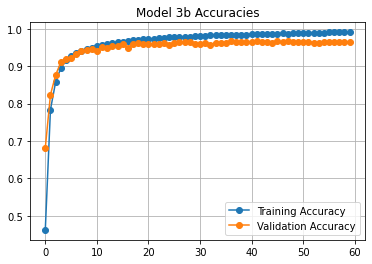

In [ ]:
model3b = Sequential()
model3b.add(Dense(32, input_shape = (28 * 28,), activation = "tanh"))           
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(32, activation = "tanh"))
model3b.add(Dense(10, activation = "softmax"))
model3b.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model3b.summary()


model3b_path = "mnist_model3b.saved_model"
model3b_history_path = "mnist_model3b.saved_model_history"


model3b.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 60,
             verbose = 1,
             validation_data = (x_test, y_test))

history3b = model3b.history.history
model3b.save(model3b_path)
pickle.dump(history3b, open(model3b_history_path, "wb"))
    
print(f"Training Accuracy: {history3b['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history3b['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 3b Accuracies")
plt.plot(history3b["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history3b["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We 've trained our model for 60 epochs. In the end we ve managed to score an accuracy of 0.9647 on the validation set. However as we can observe from the graph, from epoch 10 and on, the accuracy on the validation set is steadily lower than this on the training set, which is a sign that our model starts overfitting, and we should stop the training process. During epoch 10 the accuracy of our model on the validation set was 0.9452.

***Model_3c***

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_370 (Dense)           (None, 32)                25120     
                                                                 
 dense_371 (Dense)           (None, 32)                1056      
                                                                 
 dense_372 (Dense)           (None, 32)                1056      
                                                                 
 dense_373 (Dense)           (None, 32)                1056      
                                                                 
 dense_374 (Dense)           (None, 32)                1056      
                                                                 
 dense_375 (Dense)           (None, 32)                1056      
                                                                 
 dense_376 (Dense)           (None, 32)              

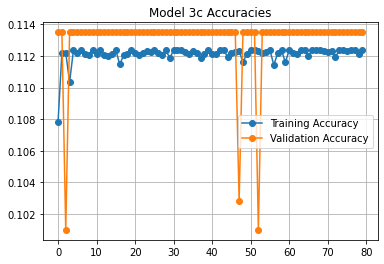

In [ ]:
model3c = Sequential()
model3c.add(Dense(32, input_shape = (28 * 28,), activation = "sigmoid"))           
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(32, activation = "sigmoid"))
model3c.add(Dense(10, activation = "softmax"))
model3c.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), metrics = ["accuracy"])
model3c.summary()


model3c_path = "mnist_model3c.saved_model"
model3c_history_path = "mnist_model3c.saved_model_history"


model3c.fit(x_train, 
             y_train,
             batch_size = 64,
             epochs = 80,
             verbose = 1,
             validation_data = (x_test, y_test))
history3c = model3c.history.history
model3c.save(model3c_path)
pickle.dump(history3c, open(model3c_history_path, "wb"))
    
print(f"Training Accuracy: {history3c['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history3c['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model 3c Accuracies")
plt.plot(history3c["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history3c["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Observations:***


We trained the model for 80 epochs, but once again we didn't manage to minimize the loss fuction at all.

So overally, for our 40-layer-models, we observe that:
The use of the sigmoid as an activation function for the hidden layers, results in our model not being trained at all. As for the tanh and ReLU activation functions, the results we got were much better, with tanh outperforming ReLU again, as it manages to achieve a better accuracy score in a much smaller number of iterations.

Now, if we were to make a comparison among all of our 9 models, we could say that the use of the tanh as an activation for the hidden layers was the best choice independently of the depth of the neural networks. Moreover, it is worth mentioning that the smaller architectures of depths 5 and 20, seem to perform equally good. The 5-layer architecture can be trained to perform decently even with a sigmoid as the activation function for the hidden layers.

On the other hand, the more complex 40-layer architecture, isn't so robust, as there seem to appear problems with its training process even when we are using the ReLU as an activation for the hidden layers.  

***References:***


https://mpewsey.github.io/2021/09/28/mnist-handwritten-digit-classification.html